# Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.tokenize import RegexpTokenizer
import string


# Loading the dataset

In [29]:
df=pd.read_csv('tweet analysis NLP(Busibud).csv')
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


# Exploratory data analysis

In [7]:
# Checking shape
df.shape

(2811774, 7)

2811774 rows and 7 columns present in the dataset.

In [12]:
# Checking datatype
df.dtypes

tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
dtype: object

In [30]:
# checking null values
df.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [31]:
# Treating null values
df.dropna(axis=1,inplace=True)

In [16]:

df.isnull().sum()

tweet_id      0
author_id     0
inbound       0
created_at    0
text          0
dtype: int64

No Null values are present in the dataset.

In [17]:
# Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   5
Count of rows in the data is:   2811774


In [18]:
# Checking unique inbound Values
df['inbound'].unique()

array([False,  True])

# Data Visualization of inbound Variables

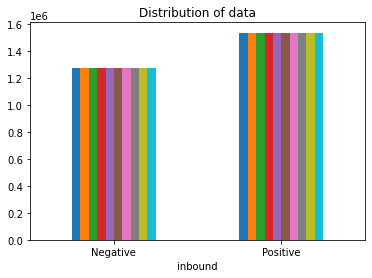

In [40]:

# Plotting the distribution for dataset.
ax = df.groupby('inbound').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['inbound'])

Postive is more than the Negative.

<AxesSubplot:xlabel='inbound', ylabel='count'>

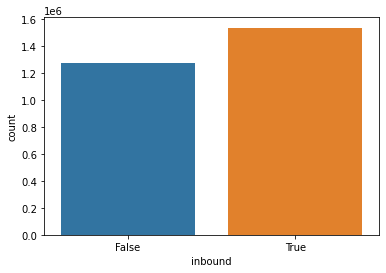

In [41]:
import seaborn as sns
sns.countplot(x='inbound', data=df)

True is more than the False.

# Preprocessing the data

In [42]:
# Selecting the text and Target column for our further analysis
data=df[['text','inbound']]

In [43]:
# Assigning 1 to Positive sentiment 4
data['inbound'] = data['inbound'].replace(4,1)

In [44]:
#  Printing unique values
data['inbound'].unique()

array([False,  True])

In [45]:
# Encodint True False as 0 and 1
df.replace({False: 0, True: 1}, inplace=True)

In [46]:
# Separating positive and negative tweets
data_pos = data[data['inbound'] == 0]
data_neg = data[data['inbound'] == 1]

In [47]:
# taking one fourth data 
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [48]:
# Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])

In [49]:
# Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

36498    @askamex  is the amex offer for $25 back on $2...
36500    @askamex i have a charge on my card that i don...
36503    @askamex i just read that amex is changing the...
36505    @askamex ok, so the only offers a user of a 3r...
36507    @askamex @askamex is there a benefit of gettin...
Name: text, dtype: object

In [52]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",]

In [53]:
# Cleaning and removing  stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    @115712 understand. would like assist you. wou...
3    @115712 please send us private message assist ...
5    @115712 please send us private message, gain d...
7    @115713 saddening hear. please shoot us dm, lo...
9    @115713 understand your concerns we'd like ple...
Name: text, dtype: object

In [54]:
# removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

36498    askamex amex offer 25 back 250 best buy eligib...
36500    askamex charge card dont recognize look via di...
36503    askamex read amex changing name hilton surpass...
36505    askamex ok offers user 3rd party issued amex c...
36507    askamex askamex benefit getting amex card vs 3...
Name: text, dtype: object

In [55]:
# removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

36498    askamex amex offer 25 back 250 best buy eligib...
36500    askamex charge card dont recognize look via di...
36503    askamex read amex changing name hilton surpass...
36505    askamex ok offers user 3rd party issued amex c...
36507    askamex askamex benefit getting amex card vs 3...
Name: text, dtype: object

In [56]:
# removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

36498    askamex amex offer 25 back 250 best buy eligib...
36500    askamex charge card dont recognize look via di...
36503    askamex read amex changing name hilton surpass...
36505    askamex ok offers user 3rd party issued amex c...
36507    askamex askamex benefit getting amex card vs 3...
Name: text, dtype: object

In [57]:
# removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

36498    askamex amex offer  back  best buy eligible ad...
36500    askamex charge card dont recognize look via di...
36503    askamex read amex changing name hilton surpass...
36505    askamex ok offers user rd party issued amex ca...
36507    askamex askamex benefit getting amex card vs r...
Name: text, dtype: object

In [59]:
# Getting tokenization of tweet text
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()


0    [w, w]
3        []
5        []
7        []
9       [w]
Name: text, dtype: object

In [62]:
# Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text']

0        [w, w]
3            []
5            []
7            []
9           [w]
          ...  
36498       [w]
36500        []
36503       [w]
36505       [w]
36507        []
Name: text, Length: 40000, dtype: object

In [63]:
# Applying Lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [w, w]
3        []
5        []
7        []
9       [w]
Name: text, dtype: object

In [64]:
# Separating input feature and label
X=data.text
y=data.inbound

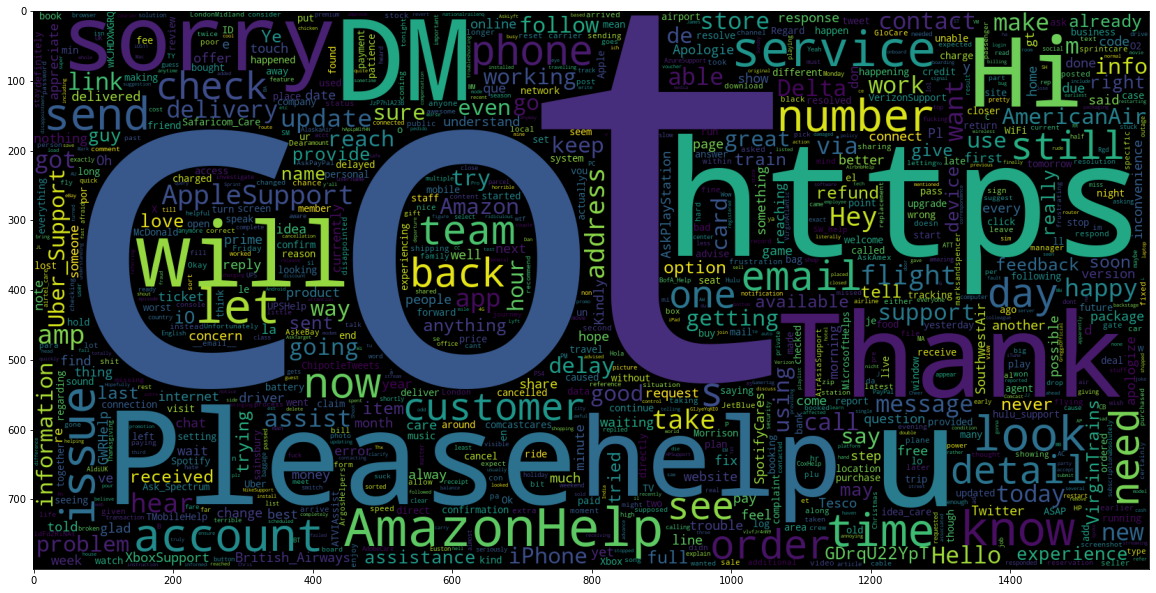

In [65]:
# Plotting a cloud of words for negative tweets
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

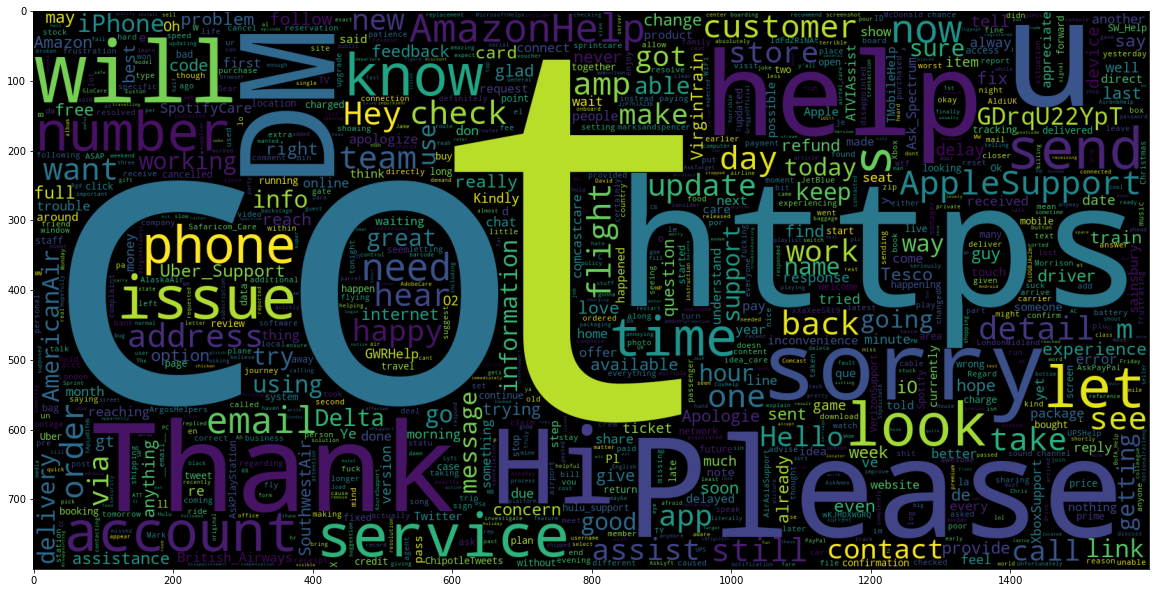

In [67]:
# Plotting a cloud of words for positive tweets
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

# Model Building

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec=TfidfVectorizer()

mnb=MultinomialNB()

features=tf_vec.fit_transform(df['text'])

x=features
y=df['inbound']

In [76]:
# train and Predict
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=43)


# prediction
mnb.fit(x_train,y_train)
pred_y=mnb.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred_y))
print('confusion matrix',confusion_matrix(y_test,pred_y))
print('classification',classification_report(y_test,pred_y))

accuracy score 0.9615204056084126
confusion matrix [[294521  23927]
 [  3122 381374]]
classification               precision    recall  f1-score   support

           0       0.99      0.92      0.96    318448
           1       0.94      0.99      0.97    384496

    accuracy                           0.96    702944
   macro avg       0.97      0.96      0.96    702944
weighted avg       0.96      0.96      0.96    702944



In [77]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.9564171939368471


So we are getting 95% cv score, means the model is performing well.